> # **Introduction**

Perkenalkan nama saya **Verindra Hernanda Putra**, nah notebook ini merupakan notebook dengan dataset yang saya ambil dari Kaggle yaitu "**Video Game Sales**", dengan harapan dataset ini bisa saya gunakan dengan baik dari **Week 1** sampai **Week 5** dalam kegiatan **Rekruitasi MBC Laboratory**

**TASK :** Regression Data - Prediksi Global Sales

In [1]:
# CaAs_Verindra Hernanda Putra - 1303223055

# Import Library

import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

> # **EDA - Exploratory Data Analysis**

In [2]:
# Panggil Dataset
df = pd.read_csv("/kaggle/input/vehicle-dataset-from-cardekho/car data.csv")

In [3]:
# Tampilkan tabel
df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [4]:
# Cek missing values
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [5]:
#  Cek Tipe Data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


> # **Data Cleansing**

In [6]:
# Mengatasi Missing Value dengan metode "Fill Mode"
df = df.dropna(axis=0)

In [7]:
# Hitung nilai NaN
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [8]:
df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


> # **Data Preprocessing**

In [10]:
# Import Library
from sklearn.preprocessing import LabelEncoder

In [11]:
le = LabelEncoder()

In [12]:
df = df.drop(columns='Car_Name', axis=1)

In [13]:
# Converting the Year Columns
Age = []
for i in df['Year']:
    Age.append(2019-i)
df.insert(2, 'Age', Age)
df.drop(columns=['Year'],inplace=True)

In [14]:
#kolom = ['fuel', 'seller_type', 'transmission', 'owner']

#onehot = pd.get_dummies(df[kolom]).astype(int)

#df = pd.concat([df, onehot], axis=1)

In [15]:
# Label Encoding
df['Fuel_Type'] = df['Fuel_Type'].map({'Petrol': 0, 'Diesel': 1, 'CNG': 2})

df['Seller_Type'] = df['Seller_Type'].map({'Dealer': 0, 'Individual': 1})

df['Transmission'] = df['Transmission'].map({'Manual': 0, 'Automatic': 1})

In [16]:
#df['Neighborhood'] = df['Neighborhood'].map({'Rural': 0, 'Suburb': 1, 'Urban': 2})

In [17]:
#df = df.drop(columns = kolom, axis=1) 

In [18]:
df

,Selling_Price,Age,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,3.35,5,5.59,27000,0,0,0,0
1,4.75,6,9.54,43000,1,0,0,0
2,7.25,2,9.85,6900,0,0,0,0
3,2.85,8,4.15,5200,0,0,0,0
4,4.60,5,6.87,42450,1,0,0,0
...,...,...,...,...,...,...,...,...
296,9.50,3,11.60,33988,1,0,0,0
297,4.00,4,5.90,60000,0,0,0,0
298,3.35,10,11.00,87934,0,0,0,0
299,11.50,2,12.50,9000,1,0,0,0


In [19]:
df['Owner'].unique()

array([0, 1, 3])

> # **Modelling**

In [20]:
# Import Library

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeRegressor

In [21]:
# Pisahkan variabel fitur dengan variabel target
X = df.drop(columns = 'Selling_Price', axis=1)
Y = df['Selling_Price']

In [22]:
# Pisahkan variabel fitur dengan variabel target
#X = df.drop(columns=['Rank', 'Name', 'Global_Sales'])
#Y = df['Global_Sales']

In [23]:
X

,Age,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,5,5.59,27000,0,0,0,0
1,6,9.54,43000,1,0,0,0
2,2,9.85,6900,0,0,0,0
3,8,4.15,5200,0,0,0,0
4,5,6.87,42450,1,0,0,0
...,...,...,...,...,...,...,...
296,3,11.60,33988,1,0,0,0
297,4,5.90,60000,0,0,0,0
298,10,11.00,87934,0,0,0,0
299,2,12.50,9000,1,0,0,0


In [24]:
# Pisahkan data menjadi train dan test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [25]:
# Standarisasi
#MMS = MinMaxScaler()
#X_train =  MMS.fit_transform(X_train)
#X_test = MMS.fit_transform(X_test)

In [26]:
# Melatih Model Regression
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [27]:
# Deteksi Overfitting
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

mse_train = mean_squared_error(Y_train, y_pred_train)
mse_test = mean_squared_error(Y_test, y_pred_test)

print("MSE Training:", mse_train)
print("MSE Testing:", mse_test)

MSE Training: 3.0672445262787895
MSE Testing: 3.5289272538943655


In [28]:
# Kecocokan Score Model
model.score(X_train, Y_train)

0.8839793496750796

In [29]:
# Prediksi Test
Y_pred = model.predict(X_test)

> # **Evaluation**

In [30]:
# Evaluasi Model
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)
print(f"Mean Squared Error: ", mse)
print(f"R-squared: ", r2)

Mean Squared Error:  3.5289272538943655
R-squared:  0.8468053957655813


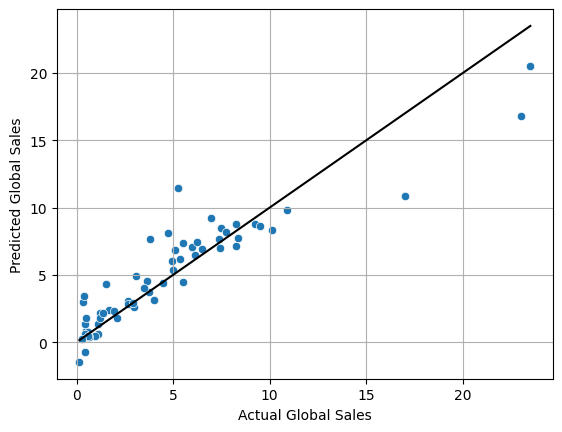

In [31]:
# Scatter plot
sns.scatterplot(x=Y_test, y=Y_pred)
plt.plot([Y_test.min(),Y_test.max()], [Y_test.min(),Y_test.max()], 'k-')
plt.xlabel('Actual Global Sales')
plt.ylabel('Predicted Global Sales')
plt.grid()
plt.show()

> **ANALISIS**

Menunjukkan korelasi positif antara nilai prediksi dan nilai aktual.